In [2]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [4]:
print(X.shape,Y.shape)

(500, 2) (500,)


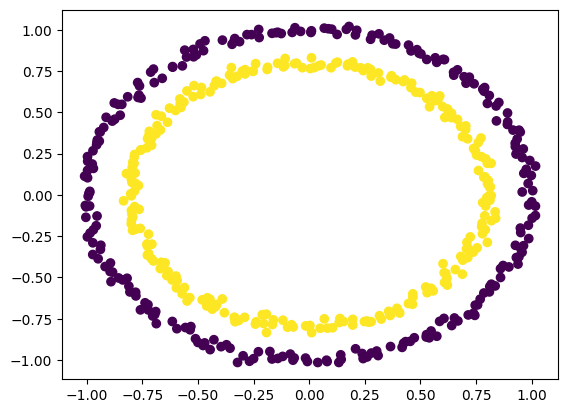

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [7]:
X_ = phi(X)

(500, 3)


In [8]:
print(X[:3,:])

[[ 0.09812565  0.77008411]
 [ 0.17919324  1.02002698]
 [ 0.4070698  -0.71554501]]


In [9]:
print(X_[:3,:])

[[ 0.09812565  0.77008411  0.60265818]
 [ 0.17919324  1.02002698  1.07256526]
 [ 0.4070698  -0.71554501  0.67771048]]


In [10]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

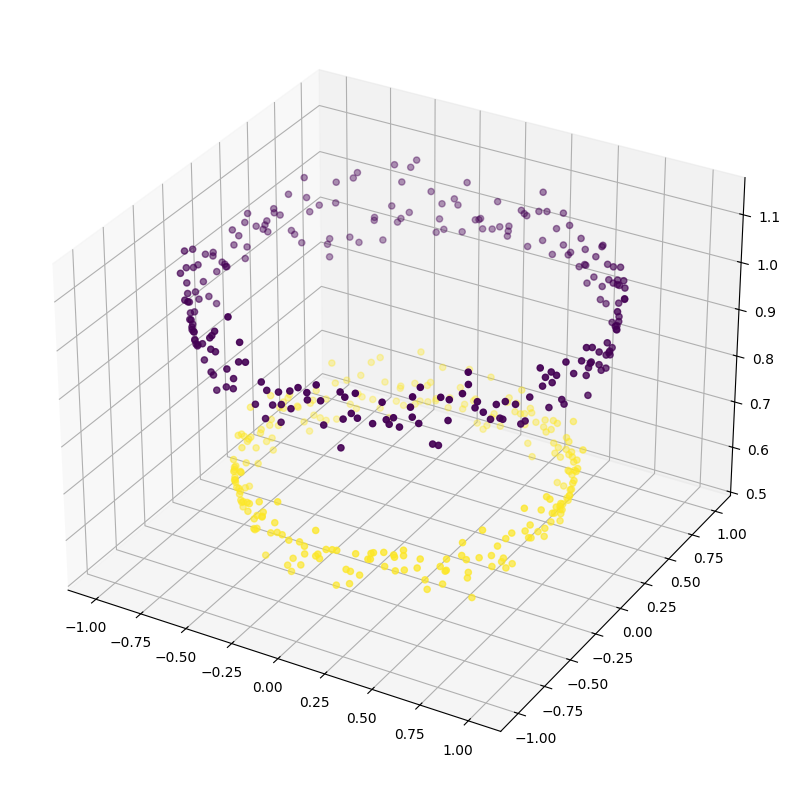

In [11]:
ax = plot3d(X_)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [13]:
lr = LogisticRegression()

In [14]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.8000


In [15]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [16]:
lr.fit(X_,Y)

LogisticRegression()

In [17]:
wts = lr.coef_
print(wts)

[[ 4.27942136e-03  6.50757268e-03 -1.08868367e+01]]


In [18]:
bias = lr.intercept_

In [19]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [20]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81794756 0.81834064 0.81873373 0.81912681]
 [0.81854531 0.81893839 0.81933147 0.81972456]
 [0.81914306 0.81953614 0.81992922 0.8203223 ]
 [0.8197408  0.82013388 0.82052697 0.82092005]]


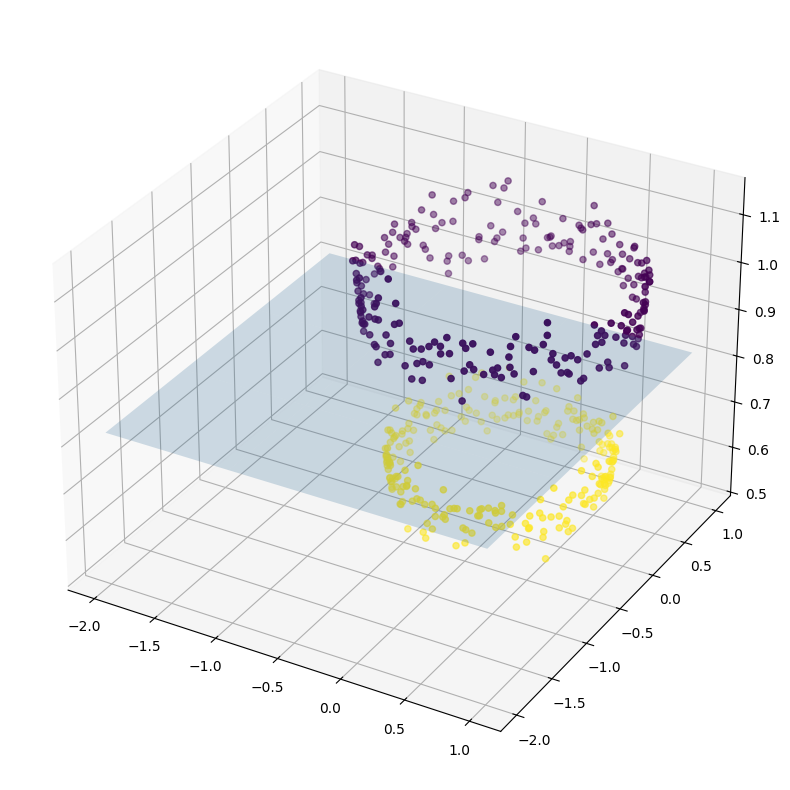

In [21]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

In [22]:
from sklearn import svm

In [23]:
svc = svm.SVC(kernel="linear")

In [24]:
svc.fit(X,Y)

SVC(kernel='linear')

In [25]:
svc.score(X,Y)

0.508

In [26]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [27]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.566

In [28]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0